In [2]:
# Standard Libraries
import sys
import os

# Data Handling and Numerical Operations
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Scikit-Learn: Preprocessing and Model Selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Scikit-Learn: Models
from sklearn.linear_model import LogisticRegression, Perceptron as SklearnPerceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC

# Scikit-Learn: Metrics and Reports
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

(1)
Preprocess the dataset: project_adult.csv & project_validation_inputs.csv

a. Handle missing values.

b. Encode categorical features.

c. Standardize numerical features.

In [3]:
# Load the training data
df = pd.read_csv('/content/project_adult.csv', na_values='?')

# Load the validation data
df_validation = pd.read_csv('/content/project_validation_inputs.csv', na_values='?')

In [4]:
# Convert the target variable 'income' to a binary format
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Display the initial count of missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values
# Drop rows where 'native-country' is missing
df.dropna(subset=['native-country'], inplace=True)

# Impute 'workclass' and 'occupation' with the mode
for col in ['workclass', 'occupation']:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Unnamed: 0           0
age                  0
workclass         1447
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1454
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     458
income               0
dtype: int64

Missing values after cleaning:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-2890809953.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:
# Engineer the 'relationship' feature by grouping categories
df['relationship'] = df['relationship'].replace({
    'Husband': 'Spouse',
    'Wife': 'Spouse',
    'Own-child': 'Child',
    'Not-in-family': 'Other',
    'Unmarried': 'Other',
    'Other-relative': 'Other'
})

# Convert 'sex' to a binary feature
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Convert 'native-country' to a binary feature (US vs. Other)
df['native-country'] = df['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

# One-hot encode all remaining object-type columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame columns after encoding:")
print(df.columns)


DataFrame columns after encoding:
Index(['Unnamed: 0', 'age', 'fnlwgt', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupati

In [6]:
# Separate the target variable (y) from the features (X)
X = df.drop('income', axis=1)
y = df['income']

# Drop the original, unnamed index column
X = X.drop('Unnamed: 0', axis=1)

# Standardize only the numerical features
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData shapes after splitting:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Data shapes after splitting:
Shape of X_train: (20472, 55)
Shape of X_test: (5118, 55)


In [7]:
# Display the initial count of missing values
print("Missing values before cleaning:")
print(df_validation.isnull().sum())

# Handle missing values
# Drop rows where 'native-country' is missing
df_validation.dropna(subset=['native-country'], inplace=True)

# Impute 'workclass' and 'occupation' with the mode
for col in ['workclass', 'occupation']:
    df_validation[col] = df_validation[col].fillna(df_validation[col].mode()[0])

print("\nMissing values after cleaning:")
print(df_validation.isnull().sum())

Missing values before cleaning:
Unnamed: 0          0
age                 0
workclass         389
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        389
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    125
dtype: int64

Missing values after cleaning:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [8]:
# Feature Engineering: Apply the same transformations as the training data
# Engineer the 'relationship' feature
if 'relationship' in df_validation.columns:
    df_validation['relationship'] = df_validation['relationship'].replace({
        'Husband': 'Spouse',
        'Wife': 'Spouse',
        'Own-child': 'Child',
        'Not-in-family': 'Other',
        'Unmarried': 'Other',
        'Other-relative': 'Other'
    })

# Convert 'sex' to a binary feature
if 'sex' in df_validation.columns:
    df_validation['sex'] = df_validation['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Convert 'native-country' to binary (US vs. Other)
if 'native-country' in df_validation.columns:
    df_validation['native-country'] = df_validation['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

print("\nValidation data after feature engineering:")
display(df_validation.head())
print("\nValidation data dtypes after feature engineering:")
display(df_validation.dtypes)


Validation data after feature engineering:


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Other,White,0,0,0,38,1
1,27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Spouse,White,0,0,0,40,1
2,28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Spouse,Black,1,0,0,55,1
3,5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Other,White,0,0,0,40,1
4,7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Other,White,1,2202,0,50,1



Validation data dtypes after feature engineering:


,0
Unnamed: 0,int64
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object


In [9]:
# Drop the original, unnamed index column from validation set if it exists
if 'Unnamed: 0' in df_validation.columns:
    df_validation = df_validation.drop('Unnamed: 0', axis=1)

# One-hot encode all remaining object-type columns
categorical_cols_validation = df_validation.select_dtypes(include=['object']).columns
df_validation = pd.get_dummies(df_validation, columns=categorical_cols_validation, drop_first=True)

print("\nValidation data after one-hot encoding:")
display(df_validation.head())
print("\nValidation data dtypes after one-hot encoding:")
display(df_validation.dtypes)


Validation data after one-hot encoding:


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Other,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,27,160178,10,0,0,0,38,1,False,True,...,False,False,False,False,True,False,False,False,False,True
1,45,50567,9,0,0,0,40,1,False,False,...,False,False,False,False,False,True,False,False,False,True
2,29,185908,13,1,0,0,55,1,False,True,...,False,False,False,False,False,True,False,True,False,False
3,30,190040,13,0,0,0,40,1,False,True,...,False,False,False,False,True,False,False,False,False,True
4,29,189346,10,1,2202,0,50,1,False,False,...,False,False,False,False,True,False,False,False,False,True



Validation data dtypes after one-hot encoding:


,0
age,int64
fnlwgt,int64
education-num,int64
sex,int64
capital-gain,int64
capital-loss,int64
hours-per-week,int64
native-country,int64
workclass_Local-gov,bool
workclass_Private,bool


In [10]:
# Align columns of validation set with training set
# This ensures the validation set has the exact same columns as the training set
# Missing columns in validation set will be added and filled with 0
# Extra columns in validation set will be dropped
X_train_columns = X_train.columns
df_validation_aligned = df_validation.reindex(columns=X_train_columns, fill_value=0)


# Standardize numerical features using the *same scaler* fitted on the training data
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Ensure that the columns to be scaled exist in the validation set
numerical_cols_validation = [col for col in numerical_cols if col in df_validation_aligned.columns]

# Use the already fitted scaler from the training data
df_validation_aligned[numerical_cols_validation] = scaler.transform(df_validation_aligned[numerical_cols_validation])

# Assign the processed validation data to X_validation
X_validation = df_validation_aligned

print("\nProcessed Validation Data Shapes:")
print("Shape of X_validation:", X_validation.shape)

print("\nProcessed Validation Data Head:")
display(X_validation.head())

print("\nProcessed Validation Data Types:")
display(X_validation.dtypes)


Processed Validation Data Shapes:
Shape of X_validation: (6388, 55)

Processed Validation Data Head:


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Never-worked,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Other,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,-0.847144,-0.279701,-0.027723,0,-0.145942,-0.217303,-0.192182,1,False,0,...,False,False,False,False,True,False,False,False,False,True
1,0.469910,-1.319136,-0.417728,0,-0.145942,-0.217303,-0.029933,1,False,0,...,False,False,False,False,False,True,False,False,False,True
2,-0.700804,-0.035705,1.142294,1,-0.145942,-0.217303,1.186938,1,False,0,...,False,False,False,False,False,True,False,True,False,False
3,-0.627635,0.003479,1.142294,0,-0.145942,-0.217303,-0.029933,1,False,0,...,False,False,False,False,True,False,False,False,False,True
4,-0.700804,-0.003102,-0.027723,1,0.162869,-0.217303,0.781314,1,False,0,...,False,False,False,False,True,False,False,False,False,True



Processed Validation Data Types:


,0
age,float64
fnlwgt,float64
education-num,float64
sex,int64
capital-gain,float64
capital-loss,float64
hours-per-week,float64
native-country,int64
workclass_Local-gov,bool
workclass_Never-worked,int64


In [11]:
display(df.head())
display(df.dtypes)

,Unnamed: 0,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,income,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Other,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,5514,33,198183,13,0,0,0,50,1,1,...,False,False,False,False,True,False,False,False,False,True
1,19777,36,86459,11,1,0,1887,50,1,1,...,False,False,False,False,False,True,False,False,False,True
2,10781,58,203039,5,1,0,0,40,1,0,...,False,False,False,False,True,False,False,False,False,True
3,32240,21,180190,11,1,0,0,46,1,0,...,False,False,False,False,False,True,False,False,False,True
4,9876,27,279872,10,1,0,0,40,1,0,...,False,False,False,False,True,False,False,False,False,True


,0
Unnamed: 0,int64
age,int64
fnlwgt,int64
education-num,int64
sex,int64
capital-gain,int64
capital-loss,int64
hours-per-week,int64
native-country,int64
income,int64


**For Presentation:**


During EDA:


--------------------------------------------------------------------------------------

### Perceptron and Adaline

---
(2) Implement the Perceptron and Adaline algorithms

a. Train Perceptron and Adline models (at least AdalineSGD).

b. Plot the number of misclassifications (Perceptron) and MSE (Adaline) over
epochs.

c. Find the accuracy of your best models from both algorithms

d. Use best performing models to predict outputs for project_validation_inputs.

e. Use provided code to implement scikit-learn’s Perceptron and Adaline algorithms. Find the accuracy on the validation data using your best models for
both



Adaline

In [12]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

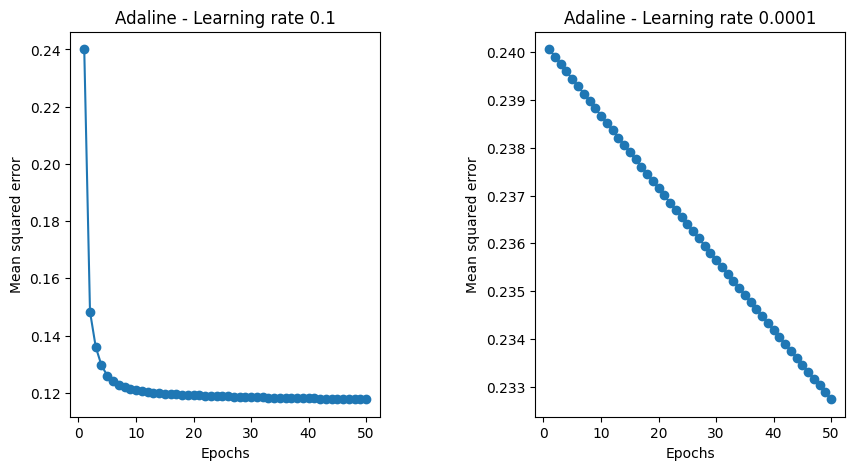

In [13]:
# Train adaptive linear neuron with AdalineGD with 2 different learning rates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ada1 = AdalineGD(n_iter=50, eta=0.1).fit(X_train, y_train)
ax[0].plot(range(1, len(ada1.losses_) + 1), ada1.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X_train, y_train)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# Adjust the horizontal space between subplots
plt.subplots_adjust(wspace=0.5)

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [14]:
# predict on trained AdalineGD models
y_pred_ada1 = ada1.predict(X_test)
print(f"Adaline accuracy with eta=0.1: {accuracy_score(y_test, y_pred_ada1):.4f}")

y_pred_ada2 = ada2.predict(X_test)
print(f"Adaline accuracy with eta=0.0001: {accuracy_score(y_test, y_pred_ada2):.4f}")

Adaline accuracy with eta=0.1: 0.8359
Adaline accuracy with eta=0.0001: 0.7595


Perceptron model.

In [15]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # if you use libarry versions stated by book use float_, else if new use float64
        # self.b_ = np.float_(0.)
        self.b_ = np.float64(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

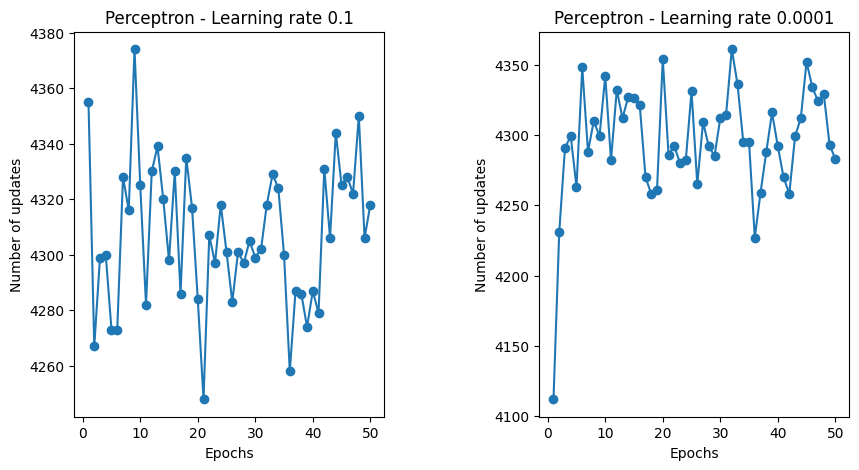

In [16]:
# Train Perceptron with 2 different learning rates and plot errors
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Convert X_train and X_test to NumPy arrays of type float
X_train_float = X_train.values.astype(np.float64)
X_test_float = X_test.values.astype(np.float64)

ppn1 = Perceptron(n_iter=50, eta=0.1).fit(X_train_float, y_train)
ax[0].plot(range(1, len(ppn1.errors_) + 1), ppn1.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number of updates')
ax[0].set_title('Perceptron - Learning rate 0.1')

ppn2 = Perceptron(n_iter=50, eta=0.0001).fit(X_train_float, y_train)
ax[1].plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Number of updates')
ax[1].set_title('Perceptron - Learning rate 0.0001')

plt.subplots_adjust(wspace=0.5)

In [17]:
# Predict on the test set with the trained Perceptron models
y_pred_ppn1 = ppn1.predict(X_test_float)
print(f"Perceptron accuracy with eta=0.1: {accuracy_score(y_test, y_pred_ppn1):.4f}")

y_pred_ppn2 = ppn2.predict(X_test_float)
print(f"Perceptron accuracy with eta=0.0001: {accuracy_score(y_test, y_pred_ppn2):.4f}")

Perceptron accuracy with eta=0.1: 0.8167
Perceptron accuracy with eta=0.0001: 0.7368


--- Adaline Model (eta=0.1) Performance ---
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      3887
        >50K       0.74      0.49      0.59      1231

    accuracy                           0.84      5118
   macro avg       0.80      0.72      0.74      5118
weighted avg       0.83      0.84      0.82      5118



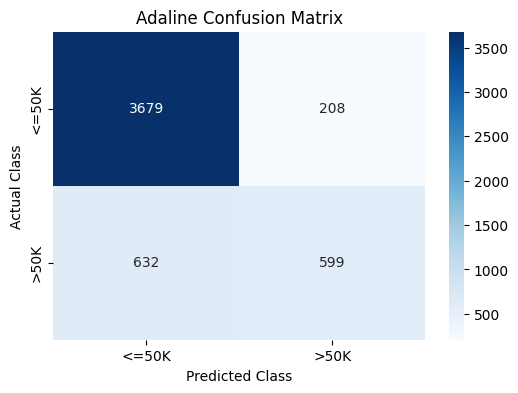



--- Perceptron Model (eta=0.1) Performance ---
              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88      3887
        >50K       0.65      0.50      0.57      1231

    accuracy                           0.82      5118
   macro avg       0.75      0.71      0.73      5118
weighted avg       0.81      0.82      0.81      5118



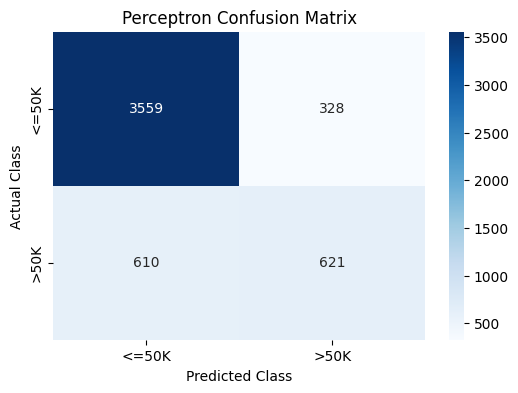

In [18]:
# --- Generate Confusion Matrix and Classification Report for the BEST Adaline Model ---
y_pred_ada1 = ada1.predict(X_test)
print("--- Adaline Model (eta=0.1) Performance ---")
print(classification_report(y_test, y_pred_ada1, target_names=['<=50K', '>50K']))

# Create the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada1)

# Plot the confusion matrix using seaborn for a nice visual
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Adaline Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print("\n" + "="*50 + "\n")

# --- Generate Confusion Matrix and Classification Report for the BEST Perceptron Model ---
# Convert X_test to a float NumPy array for the Perceptron model
X_test_float = X_test.values.astype(np.float64)
y_pred_ppn1 = ppn1.predict(X_test_float)
print("--- Perceptron Model (eta=0.1) Performance ---")
print(classification_report(y_test, y_pred_ppn1, target_names=['<=50K', '>50K']))

# Create the confusion matrix
cm_ppn = confusion_matrix(y_test, y_pred_ppn1)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Perceptron Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [19]:
# Based on the previous runs, the Adaline model with eta=0.1 and Perceptron with eta=0.1 performed better.

print(f"Best Perceptron Accuracy (eta=0.1): {accuracy_score(y_test, y_pred_ppn1):.4f}")
print(f"Best Adaline Accuracy (eta=0.1): {accuracy_score(y_test, y_pred_ada1):.4f}")


# d. Use best performing models to predict outputs for project_validation_inputs.
# Predicting on the validation set using the best Adaline model (ada1)
y_pred_ada_validation = ada1.predict(X_validation.values.astype(np.float64))

# Predicting on the validation set using the best Perceptron model (ppn1)
y_pred_ppn_validation = ppn1.predict(X_validation.values.astype(np.float64))


print("\nPredictions for Best Perceptron model on Validation Data:")
print(y_pred_ppn_validation)

print("\nPredictions for Best Adaline model on Validation Data:")
print(y_pred_ada_validation)



Best Perceptron Accuracy (eta=0.1): 0.8167
Best Adaline Accuracy (eta=0.1): 0.8359

Predictions for Best Perceptron model on Validation Data:
[0 0 1 ... 1 0 0]

Predictions for Best Adaline model on Validation Data:
[0 0 1 ... 1 0 0]


In [20]:
from sklearn.model_selection import GridSearchCV


# --- 1. Perceptron (Working Well finally) ---
param_grid_perceptron = {
    'loss': ['perceptron'],
    'penalty': ['l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
}

sgd_perceptron = SGDClassifier(random_state=60, max_iter=500, tol=1e-3)
grid_search_perceptron = GridSearchCV(estimator=sgd_perceptron, param_grid=param_grid_perceptron, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_perceptron.fit(X_train, y_train)

print(f"Best Perceptron CV Accuracy: {grid_search_perceptron.best_score_:.4f}")
print(f"Best Perceptron Parameters: {grid_search_perceptron.best_params_}\n")

param_grid_adaline = {
    'loss': ['squared_error'],
    'penalty': ['l2'],
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['adaptive', 'constant'],
    'eta0': [0.01, 0.001, 0.0001, 0.1, 1.0]     # Testing a wider range of initial learning rates
}

sgd_adaline = SGDClassifier(random_state=60, max_iter=500, tol=1e-3)
grid_search_adaline = GridSearchCV(estimator=sgd_adaline, param_grid=param_grid_adaline, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_adaline.fit(X_train, y_train)

print(f"Best Adaline (SGDClassifier) CV Accuracy: {grid_search_adaline.best_score_:.4f}")
print(f"Best Adaline Parameters: {grid_search_adaline.best_params_}\n")


best_perceptron_model = grid_search_perceptron.best_estimator_
best_adaline_model = grid_search_adaline.best_estimator_

Best Perceptron CV Accuracy: 0.8170
Best Perceptron Parameters: {'alpha': 0.1, 'loss': 'perceptron', 'penalty': 'l2'}

Best Adaline (SGDClassifier) CV Accuracy: 0.8389
Best Adaline Parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'penalty': 'l2'}



--- Scikit-learn Perceptron Performance (from GridSearchCV) ---
              precision    recall  f1-score   support

       <=50K       0.91      0.84      0.87      3887
        >50K       0.59      0.74      0.65      1231

    accuracy                           0.81      5118
   macro avg       0.75      0.79      0.76      5118
weighted avg       0.83      0.81      0.82      5118



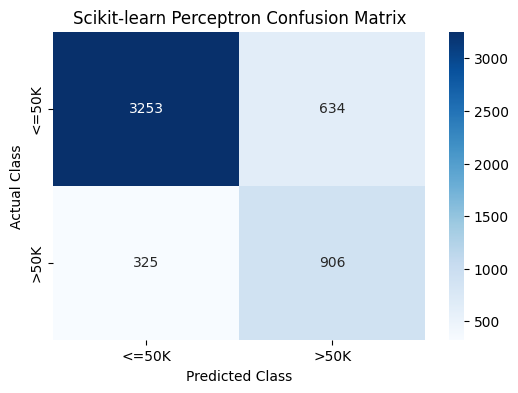



--- Scikit-learn Adaline (SGDClassifier) Performance (from GridSearchCV) ---
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      3887
        >50K       0.75      0.49      0.59      1231

    accuracy                           0.84      5118
   macro avg       0.80      0.72      0.75      5118
weighted avg       0.83      0.84      0.83      5118



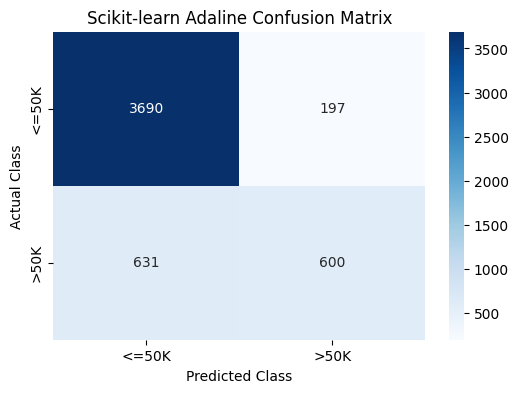

In [32]:
# --- Generate Confusion Matrix and Report for the Scikit-learn Perceptron ---
print("--- Scikit-learn Perceptron Performance (from GridSearchCV) ---")

# Use the best estimator found by GridSearchCV to make predictions
y_pred_perceptron_sklearn = best_perceptron_model.predict(X_test)

# Print the full classification report
print(classification_report(y_test, y_pred_perceptron_sklearn, target_names=['<=50K', '>50K']))

# Create and plot the confusion matrix
cm_perceptron_sklearn = confusion_matrix(y_test, y_pred_perceptron_sklearn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron_sklearn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Scikit-learn Perceptron Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print("\n" + "="*50 + "\n")

# --- Generate Confusion Matrix and Report for the Scikit-learn Adaline ---
print("--- Scikit-learn Adaline (SGDClassifier) Performance (from GridSearchCV) ---")

# Use the best estimator found by GridSearchCV to make predictions
y_pred_adaline_sklearn = best_adaline_model.predict(X_test)

# Print the full classification report
print(classification_report(y_test, y_pred_adaline_sklearn, target_names=['<=50K', '>50K']))

# Create and plot the confusion matrix
cm_adaline_sklearn = confusion_matrix(y_test, y_pred_adaline_sklearn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_adaline_sklearn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Scikit-learn Adaline Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

**For Presentation:**

Had issues when implementing the adaline sklearn.

Original model has an accuarcy of 49.8%, which was much worse than the book code.

Implemented gridsearchCV to go ahead and see why the initial hyperparameters were so bad. I initially made the parameter grid pretty much as above, but --
When I used 'optimal' learning rate I had significantly worse results. I swapped to adaptive to get better results, that ended up slightly being better than the book code and significantly better than the 49%.



--------------------------------------------------------------------------------

3 Implement Logistic Regression and SVM using scikit-learn

a. Train Logistic Regression and SVM models using scikit-learn.

b. Find the accuracy of your best models from both algorithms

c. Use best performing models to predict outputs for project_validation_inputs.

d. Select 2 features and visualize the decision boundaries

In [21]:
# Train Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Train SVM model
svm_model = SGDClassifier(loss='hinge', random_state=42)
svm_model.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [22]:
# Predict on the test set using the trained Logistic Regression model
y_pred_lr = logistic_regression_model.predict(X_test)

# Calculate and print the accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate and print the accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Logistic Regression Accuracy: 0.8517
SVM Accuracy: 0.8484


In [23]:
# Predict on the validation set using the trained Logistic Regression model
y_pred_lr_validation = logistic_regression_model.predict(X_validation)

# Predict on the validation set using the trained SVM model
y_pred_svm_validation = svm_model.predict(X_validation)

print("Predictions for Logistic Regression on Validation Data:")
print(y_pred_lr_validation)

print("\nPredictions for SVM on Validation Data:")
print(y_pred_svm_validation)

Predictions for Logistic Regression on Validation Data:
[0 0 1 ... 1 0 0]

Predictions for SVM on Validation Data:
[0 0 1 ... 1 0 0]


In [24]:
# Calculate the number of predictions where LR and SVM disagreed
disagreements = np.sum(y_pred_lr_validation != y_pred_svm_validation)
total_predictions = len(y_pred_lr_validation)

print(f"Out of {total_predictions} predictions on the validation set:")
print(f"The Logistic Regression and SVM models disagreed on {disagreements} of them.")
print(f"They agreed on {total_predictions - disagreements} of them.")

Out of 6388 predictions on the validation set:
The Logistic Regression and SVM models disagreed on 209 of them.
They agreed on 6179 of them.


In [25]:
# Count the predictions for Logistic Regression
lr_counts = np.bincount(y_pred_lr_validation)
print(f"Logistic Regression Predictions: {lr_counts[0]} predicted <=50K, {lr_counts[1]} predicted >50K")

# Count the predictions for SVM
svm_counts = np.bincount(y_pred_svm_validation)
print(f"SVM Predictions: {svm_counts[0]} predicted <=50K, {svm_counts[1]} predicted >50K")

Logistic Regression Predictions: 5107 predicted <=50K, 1281 predicted >50K
SVM Predictions: 5080 predicted <=50K, 1308 predicted >50K


--- Logistic Regression Performance ---
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      3887
        >50K       0.74      0.59      0.66      1231

    accuracy                           0.85      5118
   macro avg       0.81      0.76      0.78      5118
weighted avg       0.85      0.85      0.85      5118



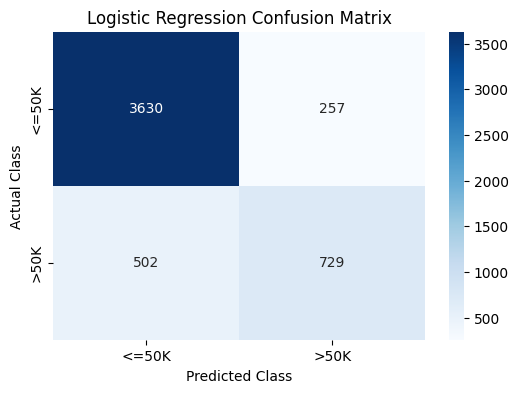



--- Linear SVM (LinearSVC) Performance ---
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3887
        >50K       0.75      0.59      0.66      1231

    accuracy                           0.85      5118
   macro avg       0.81      0.76      0.78      5118
weighted avg       0.85      0.85      0.85      5118



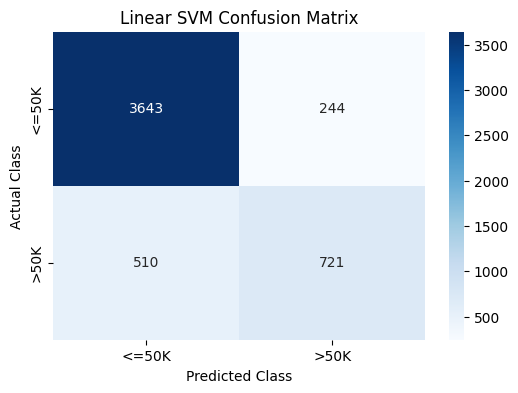

In [33]:
# --- Generate Confusion Matrix and Report for Logistic Regression ---
print("--- Logistic Regression Performance ---")

# Use the trained model to make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Print the full classification report (includes precision, recall, f1-score)
print(classification_report(y_test, y_pred_lr, target_names=['<=50K', '>50K']))

# Create the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix using seaborn for a nice visual
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print("\n" + "="*50 + "\n")

# --- Generate Confusion Matrix and Report for Linear SVM (LinearSVC) ---
print("--- Linear SVM (LinearSVC) Performance ---")

# Use the trained model to make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Print the full classification report
print(classification_report(y_test, y_pred_svm, target_names=['<=50K', '>50K']))

# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Linear SVM Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

left to do; visualize boundaries - - not linearly seperable as shown below. Double check to see if this is right

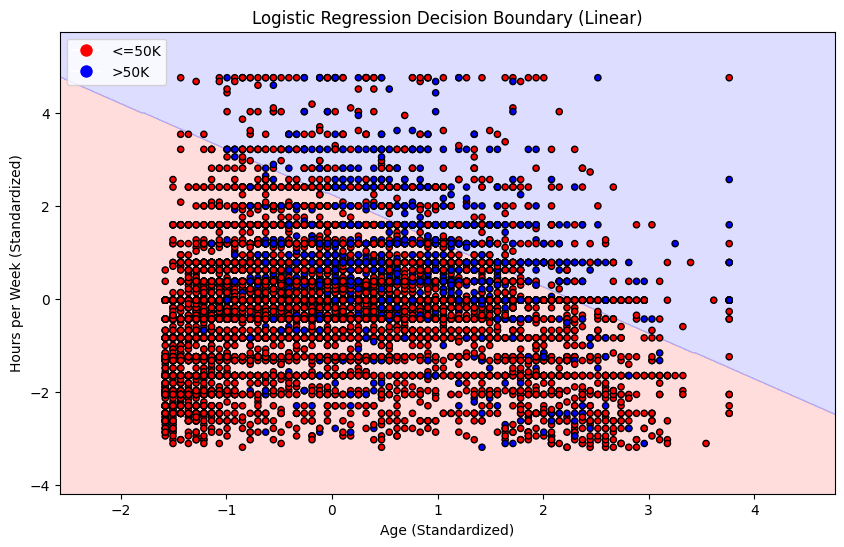

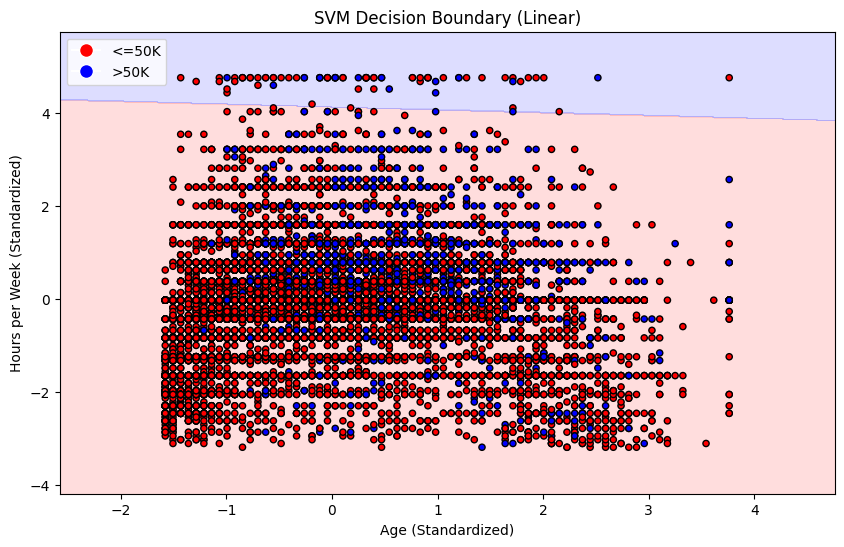

In [26]:
# --- Step 1 Select two features and prepare the data ---
#features = ['education-num', 'age']
features = ['age', 'hours-per-week']
X_train_2_features = X_train[features].values
y_train_2_features = y_train.values

def plot_decision_boundary(X, y, model, title):
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(10, 6))

    # Use consistent and clear colors for the regions
    cmap_regions = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)

    # Use consistent and clear colors for the data points
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=cmap_points)

    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Hours per Week (Standardized)')

    # Create a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='<=50K', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='>50K', markerfacecolor='blue', markersize=10)]
    plt.legend(handles=legend_elements)

    plt.show()

# --- Step 4: Generate the plots for comparison ---
lr_model_2_features = LogisticRegression(random_state=42)
lr_model_2_features.fit(X_train_2_features, y_train_2_features)
svm_model_2_features = SGDClassifier(loss='hinge', random_state=42)
svm_model_2_features.fit(X_train_2_features, y_train_2_features)


plot_decision_boundary(X_train_2_features, y_train_2_features, lr_model_2_features, 'Logistic Regression Decision Boundary (Linear)')
plot_decision_boundary(X_train_2_features, y_train_2_features, svm_model_2_features, 'SVM Decision Boundary (Linear)')

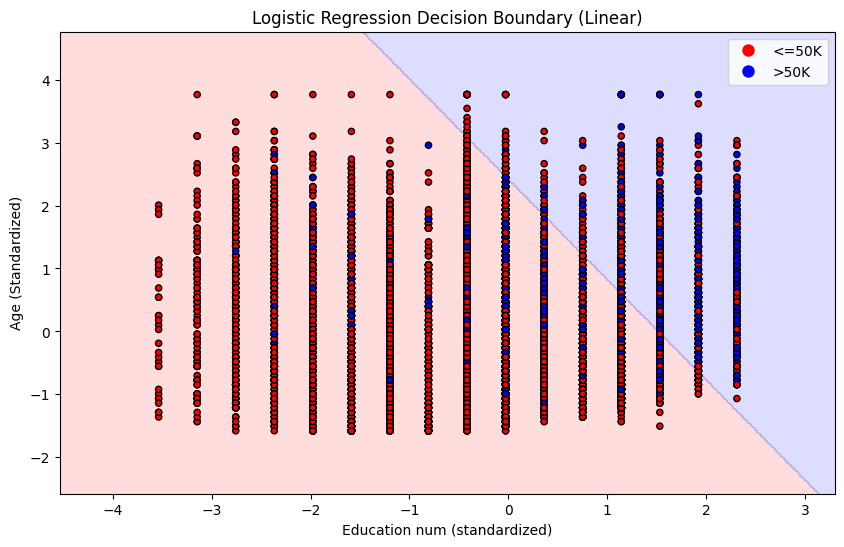

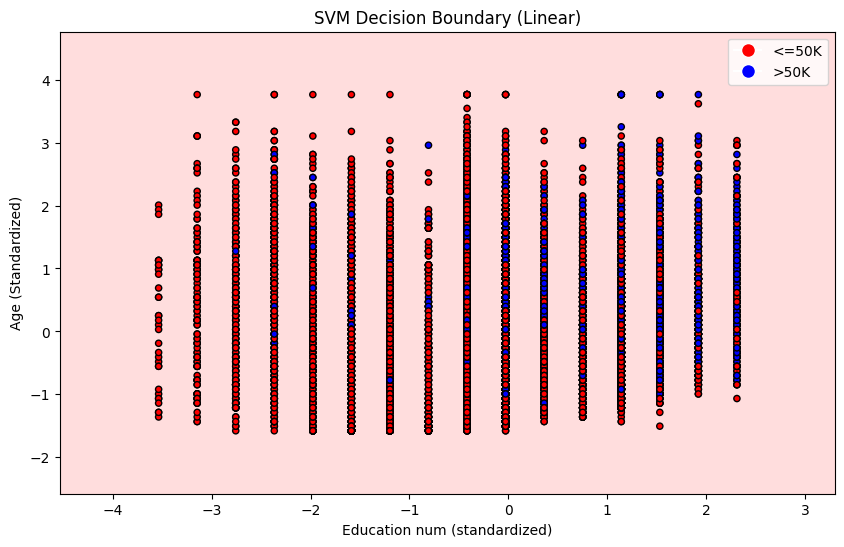

In [31]:
# --- Step 1 Select two features and prepare the data ---
features = ['education-num', 'age']

X_train_2_features = X_train[features].values
y_train_2_features = y_train.values

def plot_decision_boundary(X, y, model, title):
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(10, 6))

    # Use consistent and clear colors for the regions
    cmap_regions = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)

    # Use consistent and clear colors for the data points
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=cmap_points)

    plt.title(title)
    plt.xlabel('Education num (standardized)')
    plt.ylabel('Age (Standardized)')

    # Create a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='<=50K', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='>50K', markerfacecolor='blue', markersize=10)]
    plt.legend(handles=legend_elements)

    plt.show()

# --- Step 4: Generate the plots for comparison ---
lr_model_2_features = LogisticRegression(random_state=42)
lr_model_2_features.fit(X_train_2_features, y_train_2_features)
svm_model_2_features = SGDClassifier(loss='hinge', random_state=42)
svm_model_2_features.fit(X_train_2_features, y_train_2_features)


plot_decision_boundary(X_train_2_features, y_train_2_features, lr_model_2_features, 'Logistic Regression Decision Boundary (Linear)')
plot_decision_boundary(X_train_2_features, y_train_2_features, svm_model_2_features, 'SVM Decision Boundary (Linear)')


--- Non-Linear Model Decision Boundary ---


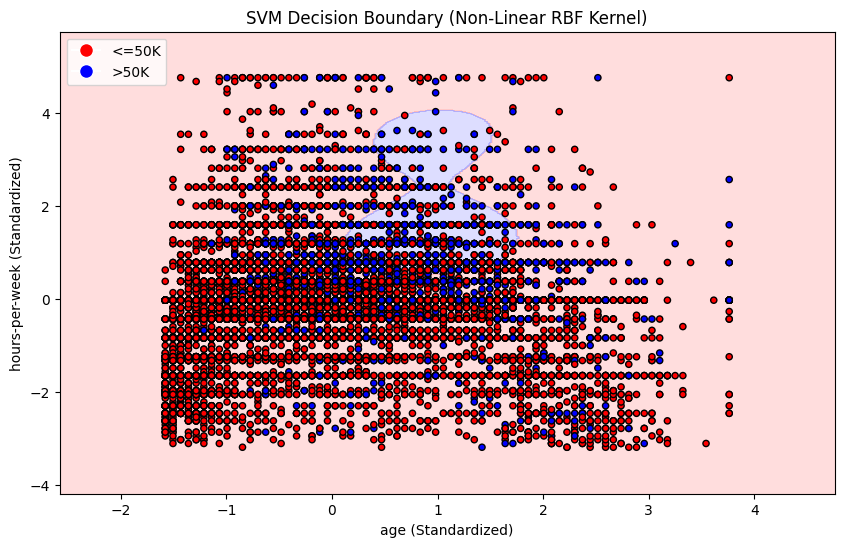

In [28]:


# --- Step 1: Select two features and prepare the data ---
features = ['age', 'hours-per-week']
X_train_2_features = X_train[features].values
y_train_2_features = y_train.values

# --- Step 2: Train the Linear Models ---
# Logistic Regression
lr_model_2_features = LogisticRegression(random_state=42)
lr_model_2_features.fit(X_train_2_features, y_train_2_features)

# Linear SVM
svm_linear_model_2_features = SVC(kernel='linear', random_state=42)
svm_linear_model_2_features.fit(X_train_2_features, y_train_2_features)

# ---Step 3: Train a Non-Linear SVM  ---
svm_rbf_model_2_features = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)
svm_rbf_model_2_features.fit(X_train_2_features, y_train_2_features)


# --- Step 4: visualize the decision boundaries ---
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    cmap_regions = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)

    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=cmap_points)

    plt.title(title)
    plt.xlabel(f'{features[0]} (Standardized)')
    plt.ylabel(f'{features[1]} (Standardized)')

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='<=50K', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='>50K', markerfacecolor='blue', markersize=10)]
    plt.legend(handles=legend_elements)
    plt.show()

print("\n--- Non-Linear Model Decision Boundary ---")
plot_decision_boundary(X_train_2_features, y_train_2_features, svm_rbf_model_2_features, 'SVM Decision Boundary (Non-Linear RBF Kernel)')

Education num is ordinal, SVM struggles to find the margin here.

(4.) Reflection and Conceptual Questions

a. Why is feature scaling important for gradient-based algorithms?

b. Explain the difference between batch gradient descent and stochastic gradient
descent.

c. Why does scikit-learn Perceptron and Adline algorithms outperform book code?

i. Research and develop an informed answer.


d. Compare the decision boundaries of logistic regression and SVM.

e. What is the role of regularization in preventing overfitting?

f. Vary the C values of the scikit-learn LogisticRegression and linear SVC models with [0.01, 1.0, 100.0]. Discuss the impact.

------------------------------------------------

a)

Feature scaling is important in gradient-based algorithms because it

1) makes it much easier for the gradient to descend when all the features are on the same scale. When you have scales like age (~17-90) and capital-gain (0-99k) this can change the shape of the cost function and make it take longer to solve.

and

2) helps prevent larger value features from overshadowing features with  smaller values. Basically just balancing the weights.


**b)**

**Batch gradient descent** - goes through the entirety of the dataset before it makes an update. This makes it slow, but is a consistent way of getting to the minimum.

**Stochastic Gradient descent** - is a much faster algorithm that approximates the gradient descent by updating the model's weights after each training example. It gets close to the miniumum, but ultimately never hits it

c)

From what I've read it has to do with a few factors. one of them being optimized code. TThe algorithms are written in this hybrid language they call 'cython' and is compiled in the more effecient language of C:

https://scikit-learn.org/stable/developers/performance.html

Another is that there is just better improvements in the algorithm its self. The book code I know uses batch gradient descent, while the sklearn one uses stochastic gradient descent. This allows for it to be quicker and has the shuffle function already built into it.

The algorithm has a better stopping function as well. the parameter 'tol' goes ahead and checks whether there has been a reduction in gain of the set tolerance

There's also the adaptive learning rate, which greatly helped my model perform better

Lastly it makes it super easy to use GridSearchCV as a function and be able to find hyperparameters much more effeciently.



d)

Both of these models produce linear decision boundaries, but they are focused on two seperate goals (as evident by how different the graphs are).

Logistic regression makes the most intuitive sense, it looks to seperate the data into a 50/50 proability split. The boundary position is influenced by the entirety of the dataset, making the line of best fit as a seperator between the two classes.

SVM boundaries, on the other hand, are not concerned with probabilities. It tries to find the line that creates the maximum possible margin.


WE can tell that this dataset isn't great with the linear SVM models; it's not as linearly seperable as we would prefer it to be. It's too heavily clumped together to get a nice margin.


e)

Regularization does it's best to prevent overfitting by adding a penalty to the models cost function. The penalty disuades the model from giving large weights to features.



f)

0.01 = Strong Regularization -->

100.0 = Weak regularization -->

In [29]:
c_values = [0.01, 1.0, 100.0]

print("--- Impact of C on Logistic Regression ---")
for c in c_values:
    # Initialize and train the model
    lr_model = LogisticRegression(C=c, solver='liblinear', random_state=42, max_iter=1000)
    lr_model.fit(X_train, y_train)

    # Predict and calculate accuracy on the test set
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"C = {c}: Test Accuracy = {accuracy:.4f}")

print("\n--- Impact of C on Linear SVM (using LinearSVC) ---")
for c in c_values:
    # Initialize and train the model using the much faster LinearSVC
    # We set dual=False as it's often recommended when n_samples > n_features
    # We also increase max_iter to ensure convergence
    svm_model = LinearSVC(C=c, random_state=42, dual=False, max_iter=2000)
    svm_model.fit(X_train, y_train)

    # Predict and calculate accuracy on the test set
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"C = {c}: Test Accuracy = {accuracy:.4f}")

--- Impact of C on Logistic Regression ---
C = 0.01: Test Accuracy = 0.8474
C = 1.0: Test Accuracy = 0.8515
C = 100.0: Test Accuracy = 0.8515

--- Impact of C on Linear SVM (using LinearSVC) ---
C = 0.01: Test Accuracy = 0.8515
C = 1.0: Test Accuracy = 0.8527
C = 100.0: Test Accuracy = 0.8527


We can see that when the models use C = 0.01 the models are performing worse, likely due to the regularization being too strong.

We can see that regularization is working considering the fact the low c vlaue hurts performance due to being too simple and underfitting.



Deliverables:

4 validation output files. This should be the predictive values your models made on project_validation_inputs. We will use these files to determine the accuracy based on the actual outputs. This should be the scikit-learn implementations of each.

You should use the following names:

o Group_#_Perceptron_PredictedOutputs.csv

o Group_#_Adaline_PredictedOutputs.csv

o Group_#_LogisticRegression_PredictedOutputs.csv

o Group_#_SVM_PredictedOutputs.csv

In [30]:
group_number = 12

# Create a dictionary to hold the prediction arrays and their corresponding model names
predictions = {
    'Perceptron': best_perceptron_model.predict(X_validation),
    'Adaline': best_adaline_model.predict(X_validation),
    'LogisticRegression': y_pred_lr_validation,
    'SVM': y_pred_svm_validation
}

# Loop through the predictions and save each one to a CSV file
for model_name, preds in predictions.items():
    # Create the filename based on the specified format
    filename = f'Group_{group_number}_{model_name}_PredictedOutputs.csv'

    # Create a pandas DataFrame. A single column named 'income' is appropriate.
    output_df = pd.DataFrame({'income': preds})

    # Save the DataFrame to a CSV file without the index
    output_df.to_csv(filename, index=False)

    # Print a confirmation message
    print(f"Successfully created file: '{filename}'")

Successfully created file: 'Group_12_Perceptron_PredictedOutputs.csv'
Successfully created file: 'Group_12_Adaline_PredictedOutputs.csv'
Successfully created file: 'Group_12_LogisticRegression_PredictedOutputs.csv'
Successfully created file: 'Group_12_SVM_PredictedOutputs.csv'
